In [1]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 20.1 MB/s eta 0:00:00


# Image-Text Retrieval 

In [2]:
from transformers.utils import logging

logging.set_verbosity_error()

In [3]:
from transformers import BlipForImageTextRetrieval
from transformers import pipeline
from sklearn.metrics.pairwise import cosine_similarity

2025-04-29 11:07:03.880811: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-29 11:07:03.880936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-29 11:07:04.005264: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/895M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [5]:
print(f"model of image-text retrival is: \n {model} in memory address")

model of image-text retrival is: 
 BlipForImageTextRetrieval(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layern

In [6]:
from transformers import AutoProcessor


In [7]:
processor = AutoProcessor.from_pretrained("Salesforce/blip-itm-base-coco")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/456 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [8]:
print(f"processor details : \n{processor}")

processor details : 
BlipProcessor:
- image_processor: BlipImageProcessor {
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_pad": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "BlipImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "BlipProcessor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  },
  "size_divisor": 32
}

- tokenizer: BertTokenizerFast(name_or_path='Salesforce/blip-itm-base-coco', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False

In [9]:
#read the image
from PIL import Image
import requests

In [10]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'

In [11]:
raw_image =  Image.open(
    requests.get(img_url, stream=True).raw).convert('RGB')

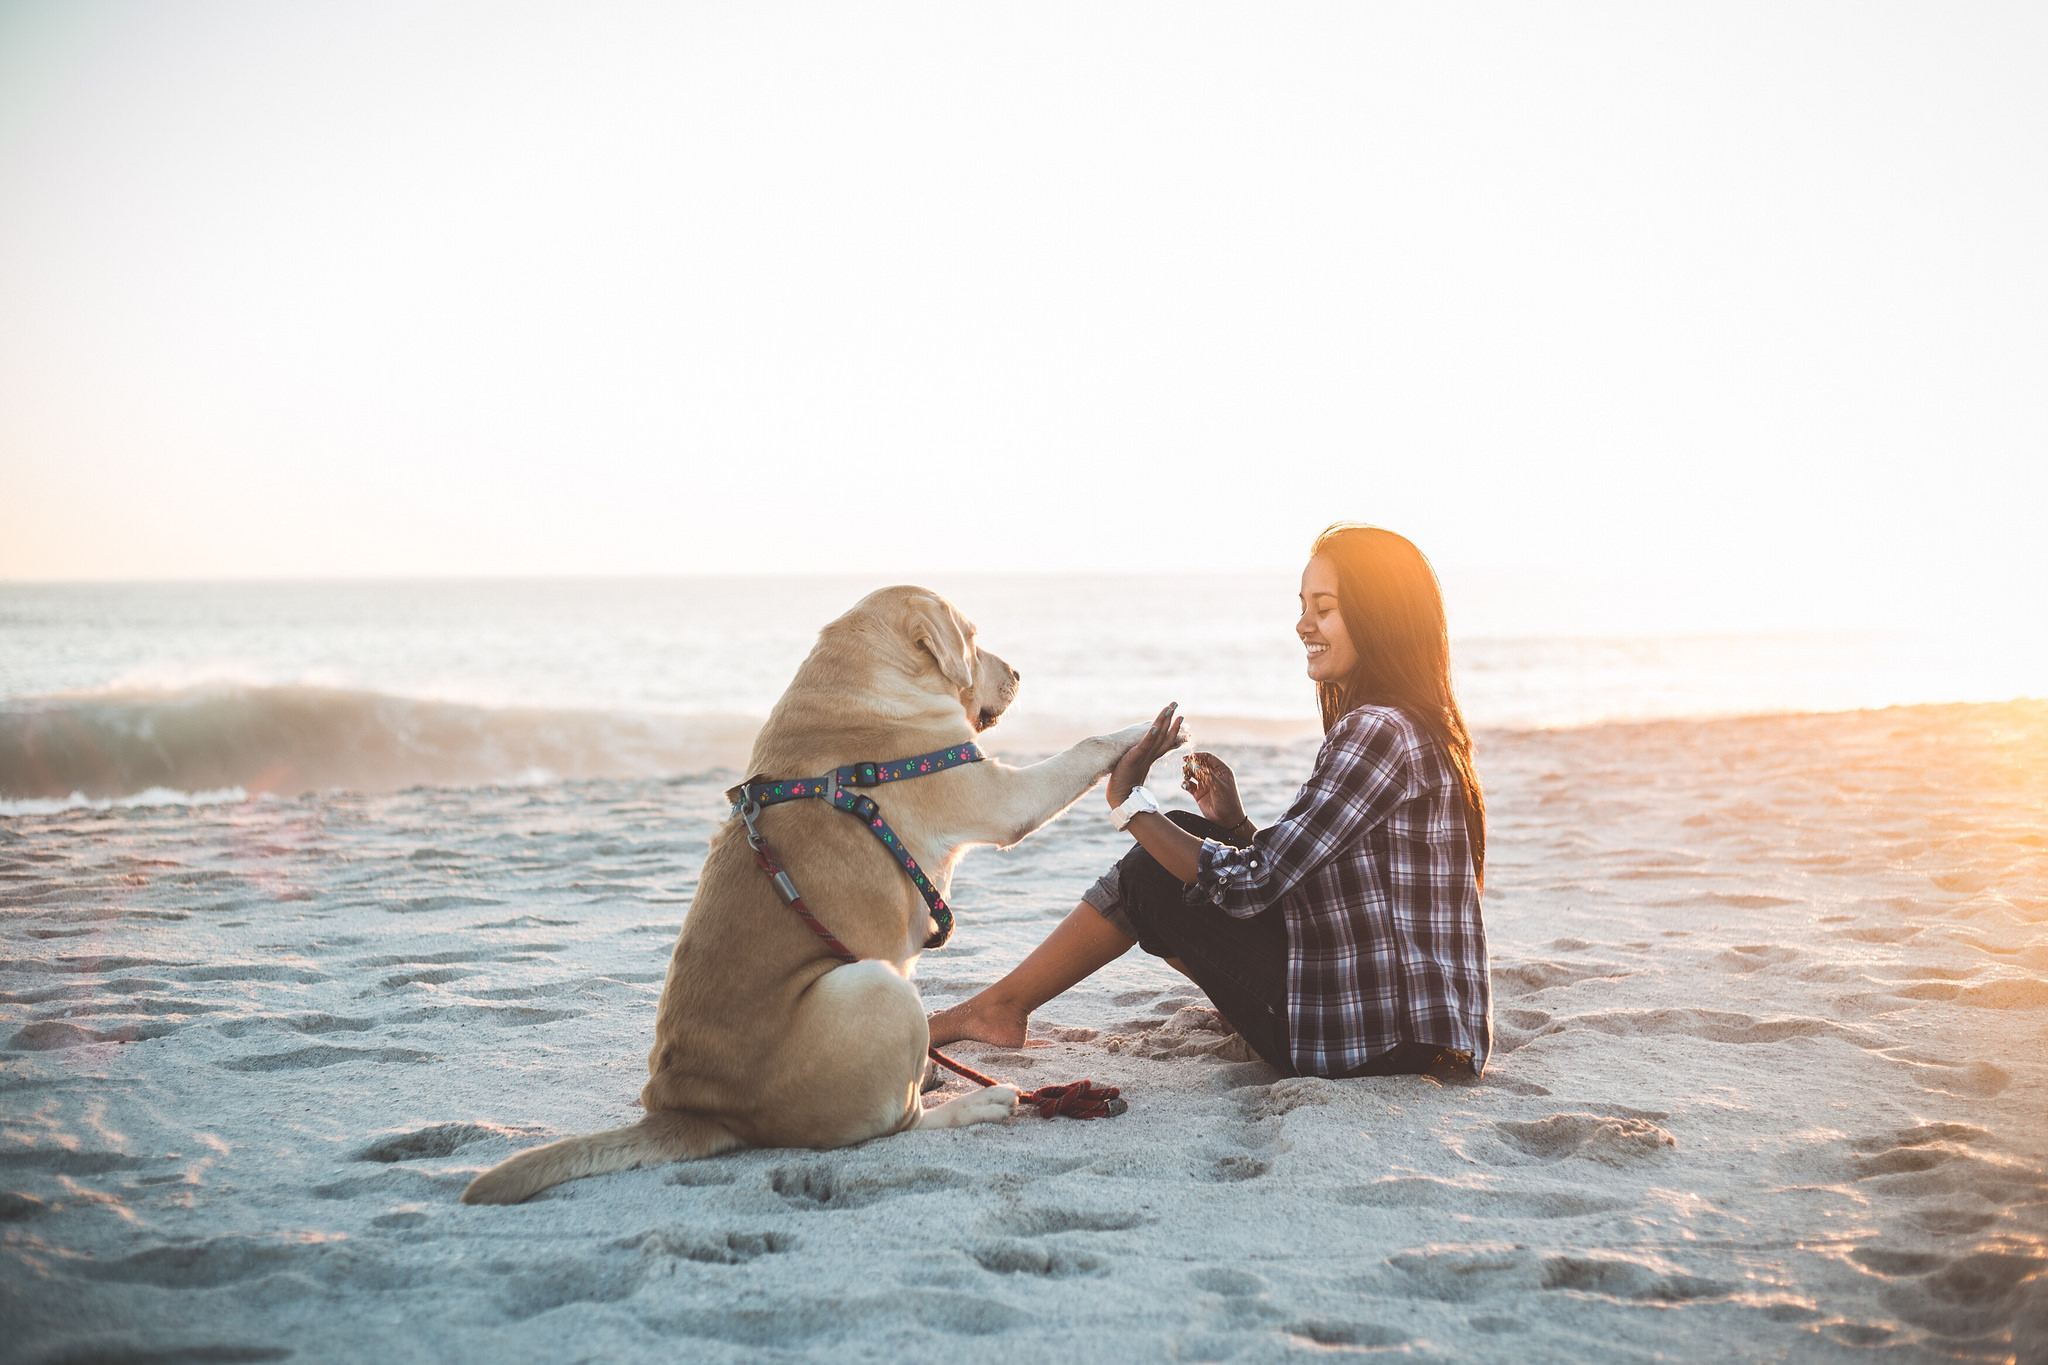

In [12]:
raw_image

# Test the Image Matches the Text

In [13]:
text = "an image of a woman and a dog on the beach"

In [14]:
#pt stands for Pytorch
inputs = processor(images = raw_image,
                   text = text,
                   return_tensors = "pt"
        )

In [15]:
print(f"input details : \n {inputs}")

input details : 
 {'pixel_values': tensor([[[[ 0.8647,  0.9230,  0.9376,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9084,  0.9376,  0.9522,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9376,  0.9376,  0.9668,  ...,  1.7552,  1.7552,  1.7552],
          ...,
          [-0.7850, -0.7850, -0.7266,  ..., -0.3178, -0.2740, -0.3616],
          [-0.7558, -0.7558, -0.7412,  ..., -0.3178, -0.3616, -0.4346],
          [-0.7558, -0.7704, -0.7850,  ..., -0.3616, -0.4346, -0.4784]],

         [[ 1.2194,  1.2495,  1.2795,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2344,  1.2645,  1.2945,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2495,  1.2795,  1.3095,  ...,  1.8948,  1.8948,  1.8948],
          ...,
          [-0.5965, -0.5965, -0.5515,  ..., -0.4014, -0.3264, -0.4164],
          [-0.5665, -0.5665, -0.5515,  ..., -0.3864, -0.4164, -0.4914],
          [-0.5665, -0.5815, -0.5965,  ..., -0.4164, -0.4764, -0.5365]],

         [[ 1.2927,  1.3211,  1.3496,  ...,  1.9753,  1.9753,  1.97

In [16]:
itm_scores = model(**inputs)[0]

```
itm_scores = model(**inputs)[0]
```

- model(**inputs): This calls the model with the provided inputs. The **inputs syntax in Python unpacks the dictionary inputs and passes its contents as keyword arguments to the model function.

- [0]: This accesses the first element of the output returned by the model. The output is likely a tuple or a list containing various elements, and [0] retrieves the first element.

- itm_scores: This assigns the result obtained from step 2 to the variable itm_scores, which likely contains the predicted scores for different classes.

In [17]:
itm_scores

tensor([[-2.2228,  2.2260]], grad_fn=<AddmmBackward0>)

In [18]:
import torch

In [19]:
itm_scores = torch.nn.functional.softmax(itm_scores, dim =1)

### softmax layer to get the probabilities

In [20]:
print(f"""\
The image and text are matched \
with a probability of {itm_scores[0][1]:.4f}""")

The image and text are matched with a probability of 0.9884


### Image to text retrieval

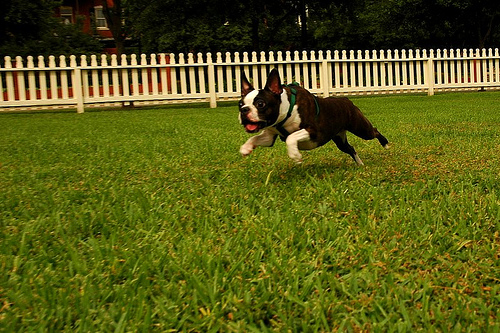

In [21]:
raw_image = Image.open("/kaggle/input/flickr8k/Images/1009434119_febe49276a.jpg")
raw_image

# Test the Image Matches the Text

In [22]:
text = "a dog running over grass"

In [23]:
#pt stands for Pytorch
inputs = processor(images = raw_image,
                   text = text,
                   return_tensors = "pt"
        )

In [24]:
print(f"input details : \n {inputs}")

input details : 
 {'pixel_values': tensor([[[[-1.7923, -1.7923, -1.7923,  ..., -1.7777, -1.7923, -1.7923],
          [-1.7923, -1.7631, -1.7777,  ..., -1.7923, -1.7923, -1.7777],
          [-1.7923, -1.7631, -1.7631,  ..., -1.7923, -1.7631, -1.7777],
          ...,
          [-0.8726, -0.7558, -0.8726,  ..., -0.4346, -0.4638, -0.4054],
          [-0.9893, -1.0039, -1.1061,  ..., -0.4492, -0.5222, -0.4638],
          [-0.9310, -1.0331, -1.1499,  ..., -0.4930, -0.5368, -0.5368]],

         [[-1.7521, -1.7521, -1.7521,  ..., -1.7371, -1.7521, -1.7521],
          [-1.7521, -1.7221, -1.7371,  ..., -1.7521, -1.7521, -1.7371],
          [-1.7521, -1.7221, -1.7221,  ..., -1.7521, -1.7221, -1.7371],
          ...,
          [-0.5815, -0.4614, -0.5515,  ...,  0.0038, -0.1463, -0.2213],
          [-0.6715, -0.7016, -0.7916,  ..., -0.0412, -0.2363, -0.2963],
          [-0.5515, -0.6565, -0.7766,  ..., -0.0862, -0.2513, -0.3264]],

         [[-1.4802, -1.4802, -1.4802,  ..., -1.4660, -1.4802, -1.48

In [25]:
itm_scores = model(**inputs)[0]

In [26]:
itm_scores

tensor([[-1.2097,  1.2165]], grad_fn=<AddmmBackward0>)

In [27]:
import torch

In [28]:
itm_scores = torch.nn.functional.softmax(itm_scores, dim =1)

In [29]:
itm_scores

tensor([[0.0812, 0.9188]], grad_fn=<SoftmaxBackward0>)

In [30]:
print(f"""\
The image and text are matched \
with a probability of {itm_scores[0][1]:.4f}""")

The image and text are matched with a probability of 0.9188


## Testing Image Retrieval

In [31]:
from tqdm.notebook import tqdm
import os

In [32]:
image_folder = "/kaggle/input/flickr8k/Images"
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(".jpg")]

In [33]:
import faiss

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [35]:
model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco").eval()
model = model.to(device)

In [36]:
def print_progress_bar(iteration, total, length=30):
    """Prints a custom progress bar."""
    percent = f"{100 * (iteration / float(total)):.1f}"
    filled_length = int(length * iteration // total)
    bar = "█" * filled_length + "-" * (length - filled_length)
    sys.stdout.write(f"\rProgress: |{bar}| {percent}% Complete")
    sys.stdout.flush()

In [37]:
import sys

In [38]:
# image_embeds_list = []
# image_paths_list = []
# total_images = len(image_paths)

# for i, img_path in enumerate(image_paths):
#     raw_image = Image.open(img_path).convert("RGB")
    
#     # process image for BLIP
#     inputs = processor(images=raw_image, return_tensors="pt")
#     inputs = {k: v.to(device) for k, v in inputs.items()}  # move tensors to GPU safely
    
#     with torch.no_grad():
#         vision_output = model.vision_model(**inputs)  
#         vision_output = vision_output.pooler_output.to(device)  
#         image_embedding = model.vision_proj(vision_output).cpu().numpy()  

#     image_embeds_list.append(image_embedding)
#     image_paths_list.append(img_path)

#     print_progress_bar(i + 1, total_images)

In [39]:
import numpy as np

In [40]:
faiss_index_path = "/kaggle/input/flickr-faiss/faiss_index.bin"
image_paths_path = "/kaggle/input/flickr-faiss/image_paths.npy"

if os.path.exists(faiss_index_path) and os.path.exists(image_paths_path):
    print("Loading existing FAISS index...")
    index = faiss.read_index(faiss_index_path)
    image_paths_list = np.load(image_paths_path, allow_pickle=True).tolist()
else:
    print("Creating new FAISS index...")

    # Stack image embeddings & normalize
    image_embeddings = np.vstack(image_embeds_list).astype("float32")
    image_embeddings /= np.linalg.norm(image_embeddings, axis=1, keepdims=True)

    # Create FAISS index
    d = image_embeddings.shape[1]  # Dimensionality
    index = faiss.IndexFlatL2(d)  # L2 distance FAISS index
    index.add(image_embeddings)  # Add all image embeddings

    # Save index and image paths
    faiss.write_index(index, faiss_index_path)
    np.save(image_paths_path, np.array(image_paths_list))

print(f"FAISS index contains {index.ntotal} embeddings.")

Loading existing FAISS index...
FAISS index contains 8091 embeddings.


## Retrieve Top-9 Images for a Query

In [41]:
import matplotlib.pyplot as plt

In [42]:
def retrieve_image(query_text, top_k=9):
    """Retrieves top-k matching images for a given text query."""
    
    inputs = processor(text=query_text, return_tensors="pt").to(device)
    
    with torch.no_grad():
        text_embedding = model.text_proj(model.text_encoder(**inputs).last_hidden_state[:, 0, :]).cpu().numpy()

    text_embedding /= np.linalg.norm(text_embedding)  

    index = faiss.read_index(faiss_index_path)
    image_paths = np.load(image_paths_path, allow_pickle=True)

    distances, indices = index.search(text_embedding, top_k)

    print(f"Retrieved Distances: {distances[0]}")

    return [image_paths[i] for i in indices[0]]

In [43]:
query = "Fire in the woods"
retrieve_image(query, top_k=9)

Retrieved Distances: [1.148888  1.203971  1.2071185 1.2308993 1.233468  1.2345194 1.2385902
 1.260677  1.3403319]


['/kaggle/input/flickr8k/Images/1807169176_7f5226bf5a.jpg',
 '/kaggle/input/flickr8k/Images/481887827_f8975dabf1.jpg',
 '/kaggle/input/flickr8k/Images/69710411_2cf537f61f.jpg',
 '/kaggle/input/flickr8k/Images/2610447973_89227ff978.jpg',
 '/kaggle/input/flickr8k/Images/3256272547_5ae6c66293.jpg',
 '/kaggle/input/flickr8k/Images/3070274658_fc39fd4f84.jpg',
 '/kaggle/input/flickr8k/Images/3138746531_f6b816c126.jpg',
 '/kaggle/input/flickr8k/Images/381052465_722e00807b.jpg',
 '/kaggle/input/flickr8k/Images/279901198_e7a88c855a.jpg']

In [44]:
# print(f"FAISS index contains {index.ntotal} images, Expected: {len(image_embeds_list)}")

In [45]:
def retrieve_and_display_images(query_text, top_k=9):
    """Retrieves top-k matching images for a given text query and displays them."""
    
    # Extract Query Embedding
    inputs = processor(text=query_text, return_tensors="pt").to(device)
    
    with torch.no_grad():
        text_embedding = model.text_proj(model.text_encoder(**inputs).last_hidden_state[:, 0, :]).cpu().numpy()

    # Normalize Query Embedding
    text_embedding /= np.linalg.norm(text_embedding)  

    # Load FAISS Index & Image Paths
    index = faiss.read_index(faiss_index_path)
    image_paths = np.load(image_paths_path, allow_pickle=True)

    # Search for Top-k Matches
    distances, indices = index.search(text_embedding, top_k)

    # Retrieve Image Paths
    retrieved_images = [image_paths[i] for i in indices[0]]

    # Display Retrieved Images
    fig, axes = plt.subplots(1, top_k, figsize=(3 * top_k, 3))
    
    for i, img_path in enumerate(retrieved_images):
        image = Image.open(img_path).convert("RGB")
        axes[i].imshow(image)
        axes[i].axis("off")
        axes[i].set_title(f"Rank {i+1}")

    plt.suptitle(f"Query: {query_text}", fontsize=14)
    plt.show()

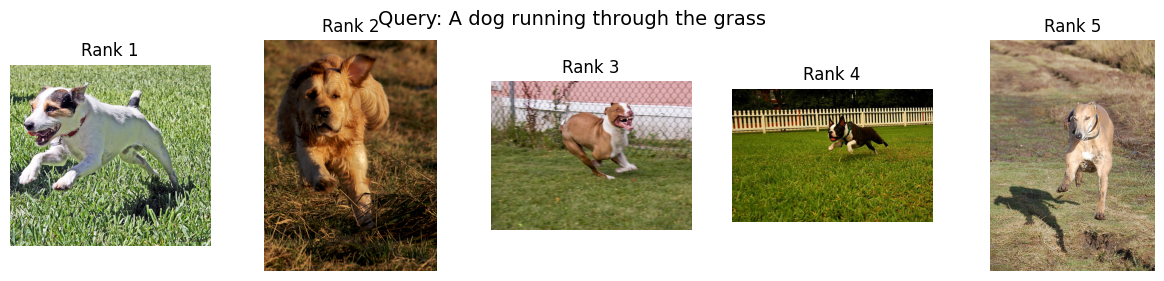

In [46]:
query = "A dog running through the grass"
retrieve_and_display_images(query, top_k=5)

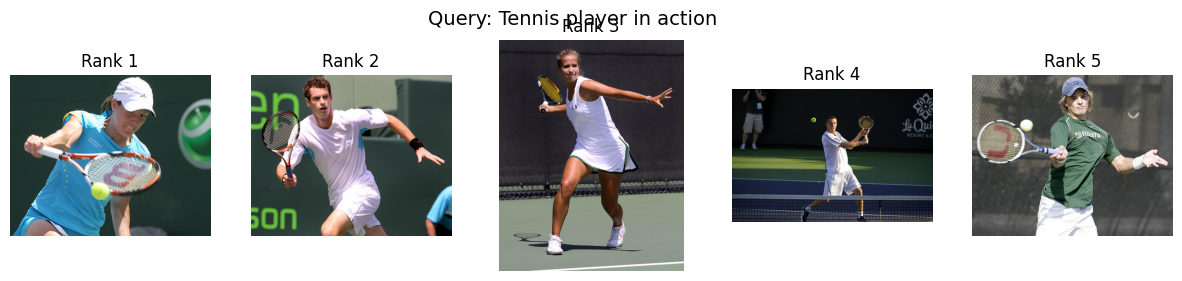

In [47]:
query = "Tennis player in action"
retrieve_and_display_images(query, top_k=5)

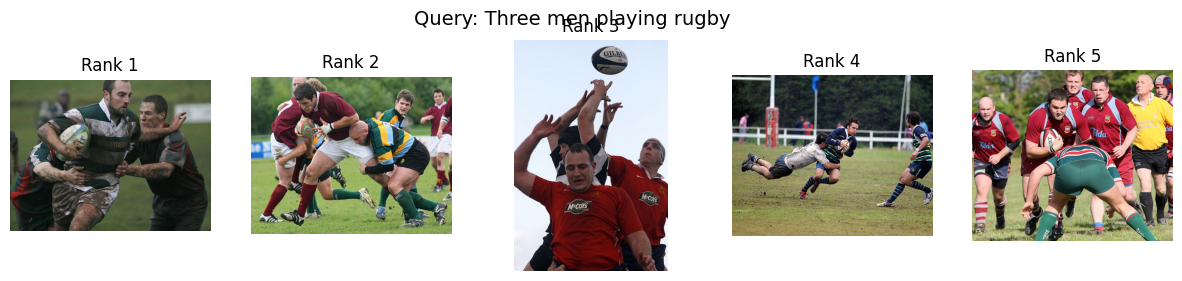

In [48]:
query = "Three men playing rugby"
retrieve_and_display_images(query, top_k=5)

# Compositional Image Retrieval
This approach enhances retrieval by generating multiple paraphrased captions for a given query, embedding them based on similarity to the original, and combining them into a weighted representation. The final query embedding better captures nuanced textual intent for retrieval.

In [49]:
generator = pipeline("text-generation", model="microsoft/phi-2", device=0)

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [50]:
def generate_augmented_captions(original_query):
    prompt = f'Given the following visual edit instruction: "{original_query}", write 5 alternative but semantically similar captions. These should paraphrase or complement the original intent, not contradict it. Return them as a numbered list.'
    
    output = generator(prompt, max_new_tokens=200, do_sample=True, temperature=0.7)[0]['generated_text']
    
    # Basic parsing to extract captions from numbered list
    import re
    captions = re.findall(r"\d+\.\s*(.+)", output)
    
    return captions[:5] if captions else [original_query]

In [51]:
def get_weighted_text_embedding(captions, original_query, processor, model, device):
    # Encode original query
    original_input = processor(text=original_query, return_tensors="pt").to(device)
    with torch.no_grad():
        original_emb = model.text_proj(model.text_encoder(**original_input).last_hidden_state[:, 0, :]).cpu().numpy()
    original_emb /= np.linalg.norm(original_emb)

    all_embeddings = []
    similarities = []

    for cap in captions:
        inputs = processor(text=cap, return_tensors="pt").to(device)
        with torch.no_grad():
            emb = model.text_proj(model.text_encoder(**inputs).last_hidden_state[:, 0, :]).cpu().numpy()
        emb /= np.linalg.norm(emb)
        all_embeddings.append(emb)
        sim = cosine_similarity(original_emb, emb)[0][0]
        similarities.append(sim)

    # Convert to weighted average
    similarities = np.array(similarities)
    similarities /= similarities.sum()  # Normalise weights
    weighted_embedding = np.sum([w * e for w, e in zip(similarities, all_embeddings)], axis=0)
    return weighted_embedding

In [52]:
def retrieve_compositional_images(reference_image_path, query_text, top_k=9, alpha=0.5):
    """
    Retrieves images based on both a reference image and a text query.
    """
    # Process reference image
    reference_image = Image.open(reference_image_path).convert("RGB")
    image_inputs = processor(images=reference_image, return_tensors="pt").to(device)

    with torch.no_grad():
        vision_output = model.vision_model(**image_inputs)
        vision_output = vision_output.pooler_output
        image_embedding = model.vision_proj(vision_output).cpu().numpy()
    image_embedding /= np.linalg.norm(image_embedding)

    # Generate augmented captions and compute weighted text embedding
    captions = generate_augmented_captions(query_text)
    print(f"Augmented Captions:\n{captions}")
    text_embedding = get_weighted_text_embedding(captions, query_text, processor, model, device)

    # Combine embeddings using alpha
    compositional_embedding = (1 - alpha) * image_embedding + alpha * text_embedding
    compositional_embedding = compositional_embedding.astype("float32")

    # Search in FAISS
    index = faiss.read_index(faiss_index_path)
    image_paths = np.load(image_paths_path, allow_pickle=True)
    distances, indices = index.search(compositional_embedding, top_k)

    return [image_paths[i] for i in indices[0]]

In [53]:
def retrieve_and_display_compositional_images(reference_image_path, query_text, top_k=9, alpha=0.7):
    """
    Retrieves and displays images based on both a reference image and a text query.
    
    Args:
        reference_image_path: Path to the reference image
        query_text: Text query describing the modification
        top_k: Number of images to retrieve
        alpha: Weight balancing image and text (0-1), higher values prioritize text
    """
    # Get retrieved image paths
    retrieved_images = retrieve_compositional_images(
        reference_image_path, query_text, top_k, alpha
    )
    
    # Display reference image and query
    plt.figure(figsize=(5, 5))
    reference_image = Image.open(reference_image_path).convert("RGB")
    plt.imshow(reference_image)
    plt.axis("off")
    plt.title("Reference Image")
    plt.show()
    
    # Display retrieved images
    fig, axes = plt.subplots(1, top_k, figsize=(3 * top_k, 3))
    
    for i, img_path in enumerate(retrieved_images):
        image = Image.open(img_path).convert("RGB")
        axes[i].imshow(image)
        axes[i].axis("off")
        axes[i].set_title(f"Rank {i+1}")
    
    plt.suptitle(f"Reference + Query: \"{query_text}\"", fontsize=14)
    plt.tight_layout()
    plt.show()

# Diffusion Latent Emulated by BLIP
* Latent Fusion: BLIP blends image and text inputs into a unified latent space, how diffusion models operate on structured latents.
* Semantic Denoising: Its compositional retrieval mimics the semantic refinement steps seen in denoising diffusion processes.
* Cross-Modal Guidance: BLIP uses text as a guiding signal over visual latents, similar to classifier-free guidance in diffusion.
* Interpolative Control: The alpha-weighted fusion of image and text embeddings parallels latent conditioning used during diffusion-based synthesis.
* Joint Embedding Space: BLIP’s vision-text projection creates a latent space where semantic continuity, as in diffusion priors, is preserved.
* Trajectory Sampling: Retrieval in BLIP traces paths through latent space defined by multimodal intent—akin to sampling from a conditional diffusion prior.
* Structured Generalisation: Like diffusion models, BLIP generalises across compositional prompts by implicitly modelling latent transitions over modality blends.

In [54]:
def evaluate_cir_metrics(model, processor, index, image_paths, captions_dict, k_values=[1, 5, 10], alpha=0.5):
    """
    Evaluates Compositional Image Retrieval metrics: Recall@K, Mean Rank, Median Rank, Cosine Similarity to GT,
    and Avg Similarity to Top-K Retrieved Images.
    
    Args:
        model: BLIP model or similar
        processor: BLIP processor
        index: FAISS index
        image_paths: List of image paths in same order as index
        captions_dict: Dict[reference_image_path] = [list of captions describing modification]
        k_values: List of K for Recall@K
        alpha: weight for combining text and image embeddings

    Returns:
        Dict of all computed metrics
    """
    recall_at_k = {k: 0 for k in k_values}
    ranks = []
    cos_sims_to_gt = []
    avg_sims_to_topk = {k: [] for k in k_values}
    total_queries = sum(len(captions) for captions in captions_dict.values())
    processed_queries = 0

    for ref_img_path, captions in captions_dict.items():
        reference_image = Image.open(ref_img_path).convert("RGB")
        image_inputs = processor(images=reference_image, return_tensors="pt").to(device)
        
        with torch.no_grad():
            vision_output = model.vision_model(**image_inputs).pooler_output
            image_emb = model.vision_proj(vision_output).cpu().numpy()

        image_emb /= np.linalg.norm(image_emb)

        for caption in captions:
            text_inputs = processor(text=caption, return_tensors="pt").to(device)
            with torch.no_grad():
                text_emb = model.text_proj(
                    model.text_encoder(**text_inputs).last_hidden_state[:, 0, :]
                ).cpu().numpy()
            text_emb /= np.linalg.norm(text_emb)

            # Compose
            compositional_emb = (1 - alpha) * image_emb + alpha * text_emb
            compositional_emb = compositional_emb.astype("float32")

            # Search FAISS
            distances, indices = index.search(compositional_emb, max(k_values))
            retrieved = [image_paths[i] for i in indices[0]]

            # --- Rank-based Metrics ---
            if ref_img_path in retrieved:
                rank = retrieved.index(ref_img_path) + 1
                ranks.append(rank)
            else:
                rank = max(k_values) + 1
                ranks.append(rank)

            for k in k_values:
                if rank <= k:
                    recall_at_k[k] += 1

            # --- Cosine similarity to GT embedding ---
            with torch.no_grad():
                ref_gt_image = Image.open(ref_img_path).convert("RGB")
                gt_inputs = processor(images=ref_gt_image, return_tensors="pt").to(device)
                gt_emb = model.vision_proj(model.vision_model(**gt_inputs).pooler_output).cpu().numpy()
                gt_emb /= np.linalg.norm(gt_emb)

            sim_to_gt = float(np.dot(compositional_emb, gt_emb.T))
            cos_sims_to_gt.append(sim_to_gt)

            # --- Average sim to top-K retrieved images ---
            for k in k_values:
                topk_embs = []
                for i in indices[0][:k]:
                    img = Image.open(image_paths[i]).convert("RGB")
                    img_input = processor(images=img, return_tensors="pt").to(device)
                    with torch.no_grad():
                        emb = model.vision_proj(model.vision_model(**img_input).pooler_output).cpu().numpy()
                    emb /= np.linalg.norm(emb)
                    topk_embs.append(emb)
                sims = [float(np.dot(compositional_emb, e.T)) for e in topk_embs]
                avg_sims_to_topk[k].append(np.mean(sims))

            processed_queries += 1
            print_progress_bar(processed_queries, total_queries)

    # --- Final metrics ---
    recall_at_k = {k: round((v / total_queries) * 100, 2) for k, v in recall_at_k.items()}
    mean_rank = round(np.mean(ranks), 2)
    median_rank = int(np.median(ranks))
    mean_sim_to_gt = round(np.mean(cos_sims_to_gt), 4)
    avg_sims_to_topk = {k: round(np.mean(v), 4) for k, v in avg_sims_to_topk.items()}

    print("\nEvaluation Metrics:")
    for k in k_values:
        print(f"Recall@{k}: {recall_at_k[k]}%")
    print(f"Mean Rank: {mean_rank}")
    print(f"Median Rank: {median_rank}")
    print(f"Cosine Similarity to Ground Truth: {mean_sim_to_gt}")
    for k in k_values:
        print(f"Avg Cosine Sim to Top-{k} Retrieved: {avg_sims_to_topk[k]}")

    return {
        "recall_at_k": recall_at_k,
        "mean_rank": mean_rank,
        "median_rank": median_rank,
        "mean_sim_to_gt": mean_sim_to_gt,
        "avg_sim_to_topk": avg_sims_to_topk
    }

Augmented Captions:
['"On the beach, the sand is a beautiful backdrop."', '"The sand is stunningly beautiful on the beach."', '"The sand on the beach is breathtaking."', '"The beach\'s sand is absolutely gorgeous."', '"The sand on the beach is a sight to behold."']


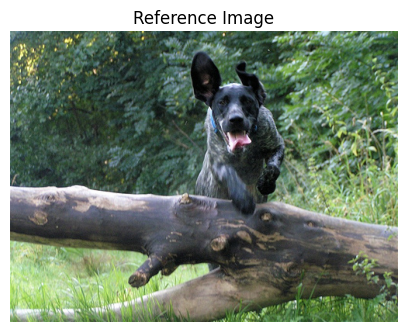

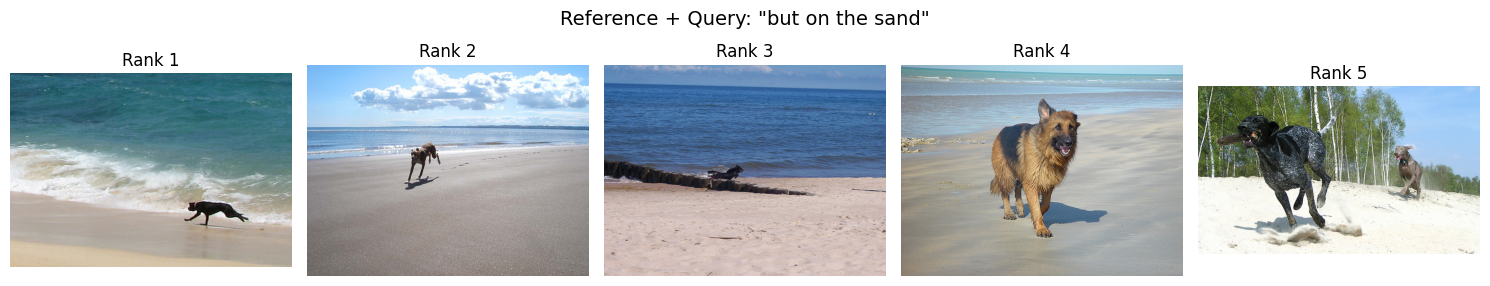

In [55]:
reference_image_path = "/kaggle/input/flickr8k/Images/1015584366_dfcec3c85a.jpg"
query_text = "but on the sand"
retrieve_and_display_compositional_images(reference_image_path, query_text, top_k=5)

Augmented Captions:
['"The young girl is ascending the steps."', '"The little girl is ascending the staircase."', '"The young girl is making her way up the stairs."', '"The little girl is climbing the steps."', '"The young girl is scaling the stairs."']


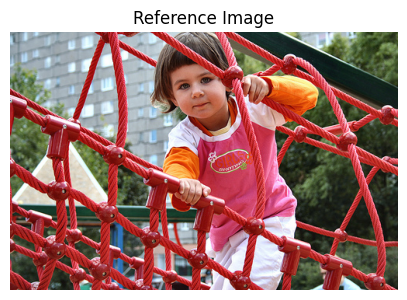

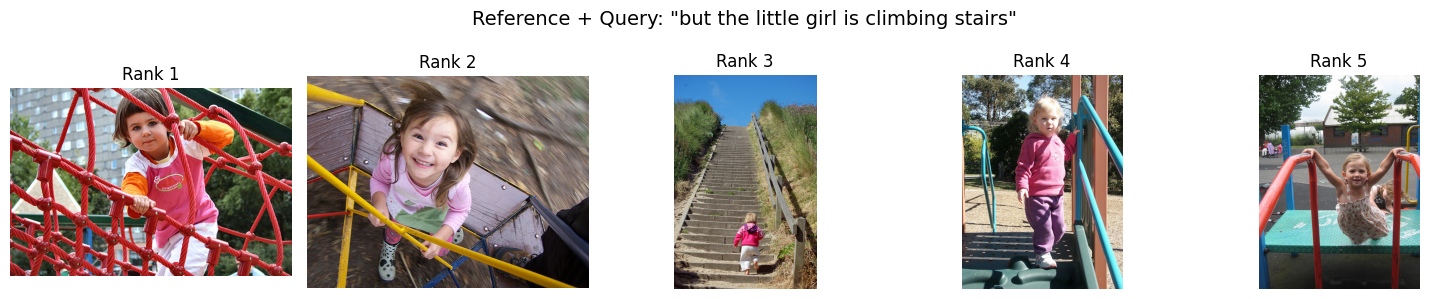

In [56]:
reference_image_path = "/kaggle/input/flickr8k/Images/1007320043_627395c3d8.jpg"
query_text = "but the little girl is climbing stairs"
retrieve_and_display_compositional_images(reference_image_path, query_text, top_k=5)

In [57]:
import csv

index = faiss.read_index(faiss_index_path)
image_paths = np.load(image_paths_path, allow_pickle=True)

# Load Captions from Dataset
captions_dict = {}

with open("/kaggle/input/flickr8k/captions.txt", "r") as f:
    reader = csv.reader(f)
    next(reader)  # Skip header row
    
    for row in reader:
        if len(row) < 2:  
            print(f"Skipping malformed line: {row}")
            continue

        image_name, caption = row[0], ",".join(row[1:])
        img_path = f"/kaggle/input/flickr8k/Images/{image_name}"
        captions_dict.setdefault(img_path, []).append(caption)

# Run Evaluation
evaluate_cir_metrics(model, processor, index, image_paths, captions_dict, k_values=[1, 5, 10])

/tmp/ipykernel_27/3924453343.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sim_to_gt = float(np.dot(compositional_emb, gt_emb.T))
/tmp/ipykernel_27/3924453343.py:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sims = [float(np.dot(compositional_emb, e.T)) for e in topk_embs]


Progress: |██████████████████████████████| 100.0% Complete
Evaluation Metrics:
Recall@1: 99.99%
Recall@5: 100.0%
Recall@10: 100.0%
Mean Rank: 1.0
Median Rank: 1
Cosine Similarity to Ground Truth: 0.7409
Avg Cosine Sim to Top-1 Retrieved: 0.7409
Avg Cosine Sim to Top-5 Retrieved: 0.6169
Avg Cosine Sim to Top-10 Retrieved: 0.5874


{'recall_at_k': {1: 99.99, 5: 100.0, 10: 100.0},
 'mean_rank': 1.0,
 'median_rank': 1,
 'mean_sim_to_gt': 0.7409,
 'avg_sim_to_topk': {1: 0.7409, 5: 0.6169, 10: 0.5874}}